
<div style="background-color:darkblue;color:blue;padding:20px;border:1px solid blue;text-align:center;">
<p><font size="14" color=white face="Lora"><i> Data Analysis on Electric Vehicle </i></font> </p>
</div>

In [3]:
!pip install plotly

In [4]:
!pip install bar-chart-race

In [5]:
#import the required libraries
import numpy as np 
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import bar_chart_race as bcr

In [6]:
data = pd.read_csv("D:\Data\dataset.csv") 
data.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

### Let's take a look at some information about the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

**Some missing data are observed**

In [8]:
data.shape

(112634, 17)

In [9]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [10]:
data=data.dropna()

In [11]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [12]:
data.duplicated().value_counts()

False    112152
dtype: int64

# Task1 :  Exploratory Data Analysis (EDA) using plotly

### Which is the make with the most electric vehicles?

In [13]:
data['Make'].value_counts().head(5)

TESLA        51883
NISSAN       12846
CHEVROLET    10140
FORD          5780
BMW           4660
Name: Make, dtype: int64

**More than 70,000 vehicles belong to the Tesla, Nissan and Chevrolet brands. However, the leading company is Tesla according to the count.**

 ###  How many vehicles are there per type?

In [14]:
data['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            85732
Plug-in Hybrid Electric Vehicle (PHEV)    26420
Name: Electric Vehicle Type, dtype: int64

**Vehicle types (BEV, PHEV) most are battery electric vehicles showing a significant transition compared to PHEVs or hybrids.**

### Which city has the most electric vehicles?

In [15]:
data['City'].value_counts().head()

Seattle      20295
Bellevue      5919
Redmond       4199
Vancouver     4013
Kirkland      3598
Name: City, dtype: int64

**The city of Seattle shows a large number of electric vehicles, this may be due to many factors, for example a greater number of electric stations.**

### Let's see top 10 Electric Vehicle Make and Electric Vehicle Model

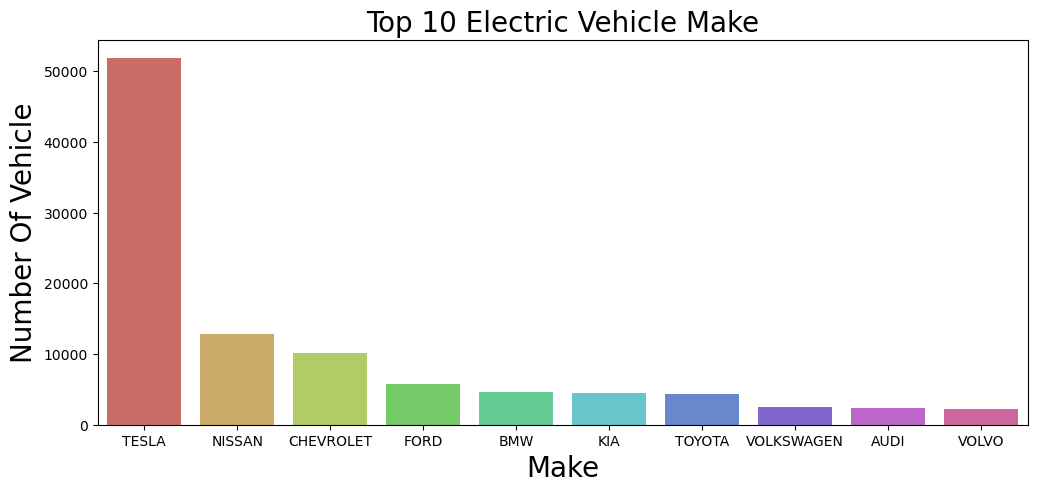

In [16]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x=data['Make'].value_counts().index[:10], y=data["Make"].value_counts()[:10], data=data, palette='hls')

plt.xlabel('Make', fontsize=20)
plt.ylabel('Number Of Vehicle', fontsize=20)

plt.title('Top 10 Electric Vehicle Make', fontsize=20)
plt.show()

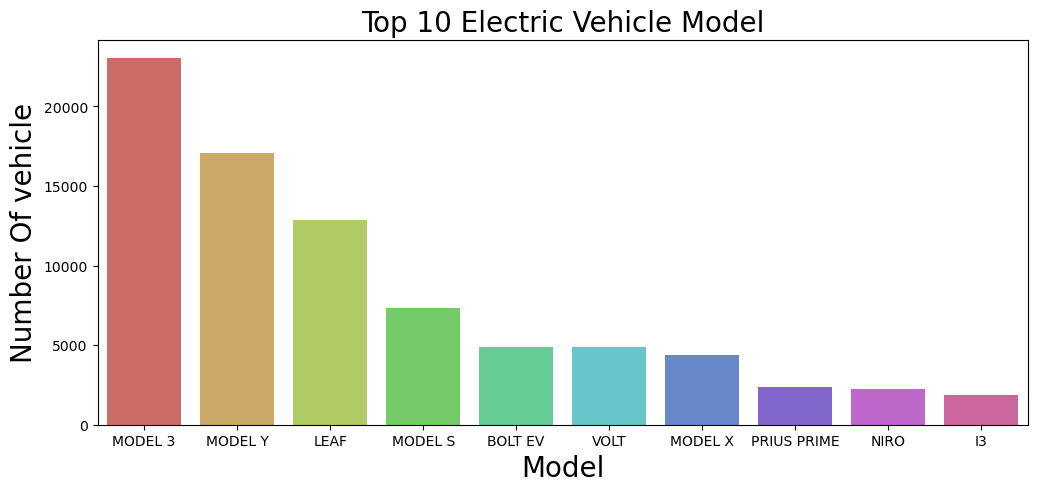

In [17]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x=data['Model'].value_counts().index[:10], y=data["Model"].value_counts()[:10], data=data, palette='hls')

plt.xlabel('Model', fontsize=20)
plt.ylabel('Number Of vehicle', fontsize=20)

plt.title('Top 10 Electric Vehicle Model', fontsize=20)
plt.show()

 ## Electric Vehicle Model Percentage by Make

In [18]:
makes = data['Make'].value_counts().index[:10]
for make in makes:
    make_model = data[data['Make'] == make]
    
    count_model=make_model['Make'].value_counts().index.value_counts().sum()
    
    model_counts = make_model['Model'].value_counts()
    fig = px.pie(data, names=model_counts.index, values=model_counts, height=300,
                 title=f'Electric Vehicle Model Percentage For {make} ({count_model} Models)')
    fig.show();

Electric Type (Battery Electric Vehicles(BEV) and Plug-in hybrid electric vehicles (PHEV)) percentage by Make

In [19]:
#Electric Vehicle Type 
px.pie(data,names=data['Electric Vehicle Type'].value_counts().index,
       values=data["Electric Vehicle Type"].value_counts(),height=400,title='Electric Vehicle Type Proportion')

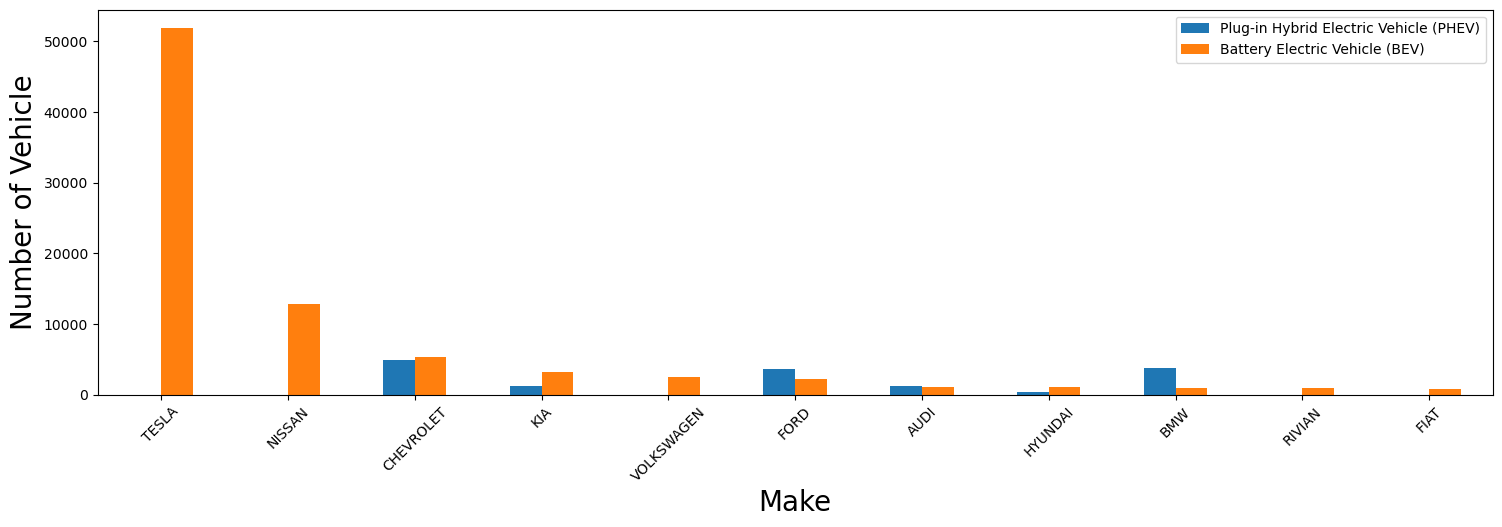

In [20]:
phev=data[data['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']['Make'].value_counts()
bev=data[data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Make'].value_counts()
df = pd.DataFrame({'Plug-in Hybrid Electric Vehicle (PHEV)': phev,'Battery Electric Vehicle (BEV)': bev}, bev.index)
df=df.fillna(0)
ax = df.iloc [0:11, :].plot.bar(rot=45,figsize=(18,5))
plt.xlabel('Make', fontsize=20)
plt.ylabel('Number of Vehicle', fontsize=20)
plt.show()

In [21]:

fig = px.bar(df.iloc[0:13, :], x=df.iloc[0:13, :].index, y=["Plug-in Hybrid Electric Vehicle (PHEV)", "Battery Electric Vehicle (BEV)"], 
             labels={},  title="PHEV and BEV type per Make",height=600,text_auto='.2s')
fig.show()

## Let analyse by Model Year

In [22]:
year_car =pd.DataFrame({'Year': data[data['Model Year'] <= 2022]['Model Year'].value_counts().index,'Number of Vehicle':   data[data['Model Year'] <= 2022]['Model Year'].value_counts()})
fig = px.line(year_car.sort_values(by='Year', ascending=False), x="Year", y="Number of Vehicle", title='Trend of the Number of Electric Vehicle from 1997 to 2022')
fig.show()

### Trend of TESLA Vehicles from 1997 to the first quarter of 2023

In [23]:
year_tesla =pd.DataFrame({'Year': data[data['Make'] == 'TESLA']['Model Year'].value_counts().index,'Number of Vehicle':   data[data['Make'] == 'TESLA']['Model Year'].value_counts()})
fig = px.line(year_tesla.sort_values(by='Year', ascending=False), x="Year", y="Number of Vehicle", title='Trend of TESLA Vehicles from 1997 to the first quarter of 2023')
fig.show()



### Electric Vehicle Type distribution for 2022 by Make

In [24]:

px.pie(data,names=data[data['Model Year'] == 2022]['Make'].value_counts().index[:10],
       values=data[data['Model Year'] == 2022]['Make'].value_counts()[:10],height=400,title='Electric Vehicle Type distribution for 2022 by Make')


### Electric Vehicle distribution by make from 2019 to 2022

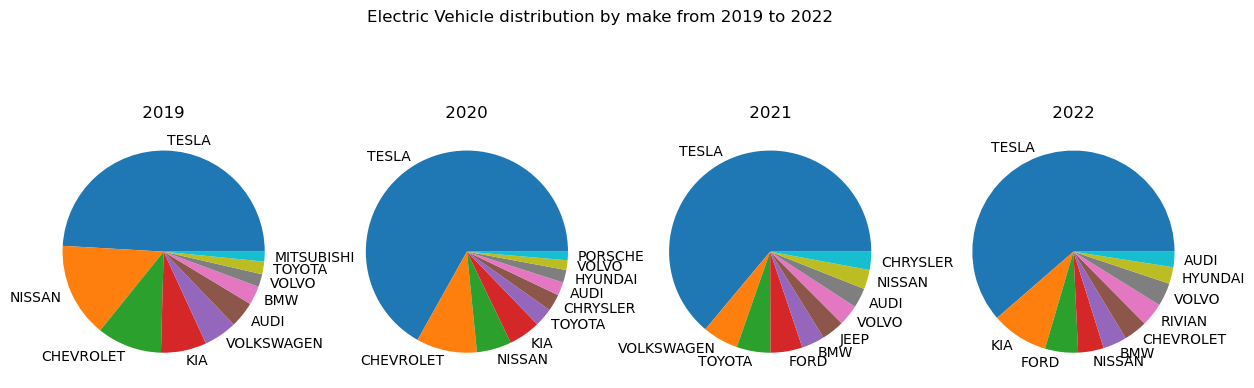

In [25]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))


for i, year in enumerate([2019, 2020, 2021, 2022]):
    make_yearly = data[data['Model Year'] == year]['Make'].value_counts()[:10]
    axs[i].pie(make_yearly.values, labels=make_yearly.index)
    axs[i].set_title(f" {year} ")
fig.suptitle('Electric Vehicle distribution by make from 2019 to 2022')
plt.show()

### Trend of the `number of vehicles` by make from `2010` to `2022`

In [26]:
import plotly.graph_objects as go

fig = go.Figure()
makes = [ 'TESLA','NISSAN', 'CHEVROLET', 'KIA', 'FORD']

for make in makes:
    yearly = data['Model Year'][data['Make'] == make].value_counts()
    yearly = pd.DataFrame({'Year': yearly.index,'Number of Vehicles': yearly.values}).sort_values(by=['Year'])
    fig.add_trace(go.Scatter(x=yearly[(yearly['Year']>=2010) & (yearly['Year']<=2022)]['Year'], y=yearly[(yearly['Year']>=2010) & (yearly['Year']<=2022)]['Number of Vehicles'], mode='lines',name=make))
fig.update_layout(title='Trend of the number of vehicles by make from 2010 to 2022 ')
fig.show();


### Top 10 models with best Electric Range

In [27]:
bev_model_range=data[data['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)'].sort_values(by='Electric Range',ascending=False)['Model'].unique()[:10]

print("Top 10 Models")
for i in range(0, 10) :
    print(f"Number {i+1}:", bev_model_range[i])



Top 10 Models
Number 1: MODEL S
Number 2: MODEL 3
Number 3: MODEL X
Number 4: MODEL Y
Number 5: BOLT EV
Number 6: KONA
Number 7: ROADSTER
Number 8: NIRO
Number 9: I-PACE
Number 10: PS2


In [28]:
phev_model_range=data[data['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)'].sort_values(by='Electric Range',
                                                                                         ascending=False)['Model'].unique()[:10]
print("Top 10 Models")
for i in range(0, 10) :
    print(f"Number {i+1}:", phev_model_range[i])


Top 10 Models
Number 1: I3
Number 2: VOLT
Number 3: CLARITY
Number 4: RAV4 PRIME
Number 5: S60
Number 6: V60
Number 7: ELR
Number 8: ESCAPE
Number 9: NX
Number 10: XC90


## Task2 : Choropleth to display the number of Electric Vehicles based on location.

In [29]:
states = list(data.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)
values = data.groupby('State').count().sort_values(by='City',ascending=False)['City'].values

In [30]:
df = pd.DataFrame(data.groupby('State').count().sort_values(by='City',ascending=False)['City'])

In [31]:
df = df.reset_index()

In [32]:
df.columns = ['State','Count']

In [33]:
fig = px.choropleth(df,
                    locations='State', 
                    locationmode="USA-states", 
                    color='Count',
                    color_continuous_scale="blues", 
                    scope="usa")

fig.show();

### **Observation:**
- Most of the Electric vehicles are from 'WA' state

### Task3 : Racing Bar Plot to display the animation of Electric Vehicle Make and its count each year

In [34]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [42]:
df1 = pd.crosstab(index=data['Model Year'], columns=data['Make'])
df1.head()

Make        AUDI  AZURE DYNAMICS  BENTLEY  BMW  CADILLAC  CHEVROLET  CHRYSLER  \
Model Year                                                                      
1997           0               0        0    0         0          1         0   
1998           0               0        0    0         0          0         0   
1999           0               0        0    0         0          0         0   
2000           0               0        0    0         0          0         0   
2002           0               0        0    0         0          0         0   

Make        FIAT  FISKER  FORD  ...  POLESTAR  PORSCHE  RIVIAN  SMART  SUBARU  \
Model Year                      ...                                             
1997           0       0     0  ...         0        0       0      0       0   
1998           0       0     1  ...         0        0       0      0       0   
1999           0       0     3  ...         0        0       0      0       0   
2000           0       0    10  ...         0        0       0      0       0   
2002           0       0     0  ...         0        0       0      0       0   

Make        TESLA  TH!NK  TOYOTA  VOLKSWAGEN  VOLVO  
Model Year                                           
1997            0      0       0           0      0  
1998            0      0       0           0      0  
1999            0      0       0           0      0  
2000            0      0       0           0      0  
2002            0      0       2           0      0  

[5 rows x 34 columns]

In [45]:
bcr.bar_chart_race(
    df = df1,

    # sort the bar for each period
    sort="desc",


    # number of bars to display in each frame
    n_bars=10,


    # smoothness of the animation
    steps_per_period=45,
    period_length=3000,


    # custom set of colors
    cmap=[
        '#6ECBCE', '#FF2243', '#FFC33D', '#CE9673', '#FFA0FF', '#6501E5', '#F79522', '#699AF8', '#34718E', '#00DBCD',
        '#00A3FF', '#F8A737', '#56BD5B', '#D40CE5', '#6936F9', '#FF317B', '#0000F3', '#FFA0A0', '#31FF83', '#0556F3'
    ],
    # title and its styles
    title='Racing Bar Chart of EV Make and its count each year',
    # adjust the position and style of the period label
    period_label={'x': .98, 'y': .10,
                  'ha': 'right',
                  'va': 'center',
                  'size': 10,
                  'weight': 'semibold'
                  }
)

D:\anaconda\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

D:\anaconda\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

D:\anaconda\lib\site-packages\bar_chart_race\_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



-----


# Conclusions:
- Applied Exploratory Data Analysis(Univariate and Bivariate) using plotly.express library and got insights from the data.
- Created a Choropleth to display the number of EV vehicles based on location
- Created a Racing Bar Plot to display the animation of EV Make and its count each year.
